In [ ]:
## Questions to Answer

# 

In [69]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import pandas as pd
from pprint import pprint

In [70]:
disaster_data = "Resources/disaster_cost_count.csv"
disaster_df = pd.read_csv(disaster_data)

#load resource file
natural_disaster_file = "Resources/State Time Series 1980-2020.csv"

#Read file and store it in a data frame
disaster_data_df = pd.read_csv(natural_disaster_file)

#temperature data
file_load = "Resources/ave_temp_usa_year.csv"

temp_avg_year = pd.read_csv(file_load)

temp_avg_year.head()

temp_avg_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1392 non-null   float64
 1    Year                    1392 non-null   int64  
 2    Statistics              1392 non-null   object 
 3    Country                 1392 non-null   object 
 4    ISO3                    1392 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 54.5+ KB


In [71]:
#convert celsius to farneheight 
#formula=(0°C × 9/5) + 32

to_faren = (temp_avg_year["Temperature - (Celsius)"] * (9/5)) + 32

to_faren

0       21.719840
1       20.196140
2       31.991900
3       40.616186
4       53.751200
          ...    
1387    68.326160
1388    60.827000
1389    50.340740
1390    38.058998
1391    24.705500
Name: Temperature - (Celsius), Length: 1392, dtype: float64

In [72]:
#append temps in deg farenheight to df 

farenheight = []

for f in to_faren:
    
    farenheight.append(f)


#print(farenheight)

In [73]:
temp_avg_year["Temp F"] = farenheight

#temp_avg_year.head()

#round farenheight

temp_avg_year = temp_avg_year.round({'Temp F': 2})

temp_avg_year

,Temperature - (Celsius),Year,Statistics,Country,ISO3,Temp F
0,-5.71120,1901,Jan Average,United States,USA,21.72
1,-6.55770,1901,Feb Average,United States,USA,20.20
2,-0.00450,1901,Mar Average,United States,USA,31.99
3,4.78677,1901,Apr Average,United States,USA,40.62
4,12.08400,1901,May Average,United States,USA,53.75
...,...,...,...,...,...,...
1387,20.18120,2016,Aug Average,United States,USA,68.33
1388,16.01500,2016,Sep Average,United States,USA,60.83
1389,10.18930,2016,Oct Average,United States,USA,50.34
1390,3.36611,2016,Nov Average,United States,USA,38.06


In [74]:
#rename columns---columns appear to have spaces

temp_avg_year = temp_avg_year.rename(columns={" Year": "Year", " Statistics": "Month"})

temp_avg_year



,Temperature - (Celsius),Year,Month,Country,ISO3,Temp F
0,-5.71120,1901,Jan Average,United States,USA,21.72
1,-6.55770,1901,Feb Average,United States,USA,20.20
2,-0.00450,1901,Mar Average,United States,USA,31.99
3,4.78677,1901,Apr Average,United States,USA,40.62
4,12.08400,1901,May Average,United States,USA,53.75
...,...,...,...,...,...,...
1387,20.18120,2016,Aug Average,United States,USA,68.33
1388,16.01500,2016,Sep Average,United States,USA,60.83
1389,10.18930,2016,Oct Average,United States,USA,50.34
1390,3.36611,2016,Nov Average,United States,USA,38.06


In [75]:
#clean up df 

temp_avg_year = temp_avg_year[['Year','Month','Temp F']]

temp_avg_year



,Year,Month,Temp F
0,1901,Jan Average,21.72
1,1901,Feb Average,20.20
2,1901,Mar Average,31.99
3,1901,Apr Average,40.62
4,1901,May Average,53.75
...,...,...,...
1387,2016,Aug Average,68.33
1388,2016,Sep Average,60.83
1389,2016,Oct Average,50.34
1390,2016,Nov Average,38.06


In [76]:
#avg temp by year variable 

temp_group = temp_avg_year.groupby("Year")

temp_mean_year = temp_group["Temp F"].mean()

temp_mean_year=pd.DataFrame(temp_mean_year)

#temp_mean_year

In [77]:
#get distinct years into an array so they have same value counts as temp_mean_year (this is so you can plot it below) (116 rows)

years=[]

for year in temp_avg_year:
    
    years.append(temp_avg_year["Year"])
    
    

years[0]

years = years[0].unique()

#years


Text(0.5, 1.0, 'Average Temp in US 1905-2016')

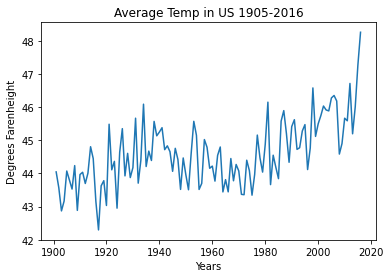

In [78]:
#plot the avg temp in US 

plt.plot(years, temp_mean_year)

plt.xlabel("Years")
plt.ylabel("Degrees Farenheight")
plt.title("Average Temp in US 1905-2016")

In [28]:
#bin into seasons, get avg change by year by season- 4 charts 

month_bin = [month%12 // 3 + 1 for month in range(1, 13)]

    
month_bin

[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]

In [29]:
months = temp_avg_year["Month"].unique()

#months

months = months.tolist()

#months

In [62]:
#have two equal lists for months and seasons, convert to df 
seasons = pd.DataFrame({"Month": months, "Seasons ": month_bin})

#seasons

In [61]:
#merge dfs to get the seasons into our df 

avg_temp_seasons = temp_avg_year.merge(seasons, on='Month')

#avg_temp_seasons

In [65]:
#create df of disaster costs
total_disaster_cost = disaster_df[["Year","Drought Cost","Flooding Cost","Freeze Cost","Severe Storm Cost","Tropical Cyclone Cost","Wildfire Cost","Winter Storm Cost","All Disasters Cost"]]
total_disaster_cost = disaster_df.set_index("Year")
total_disaster_cost

,Drought Count,Drought Cost,Flooding Count,Flooding Cost,Freeze Count,Freeze Cost,Severe Storm Count,Severe Storm Cost,Tropical Cyclone Count,Tropical Cyclone Cost,Wildfire Count,Wildfire Cost,Winter Storm Count,Winter Storm Cost,All Disasters Count,All Disasters Cost
Year,,,,,,,,,,,,,,,,
1980,1,33.5,1,2.4,0,0.0,0,0.0,1,2.0,0,0.0,0,0.0,3,37.9
1981,0,0.0,0,0.0,1,1.7,1,1.2,0,0.0,0,0.0,0,0.0,2,2.9
1982,0,0.0,0,0.0,0,0.0,2,2.6,0,0.0,0,0.0,1,1.8,3,4.4
1983,1,7.9,2,8.3,1,5.3,0,0.0,1,8.0,0,0.0,0,0.0,5,29.5
1984,0,0.0,0,0.0,0,0.0,2,2.6,0,0.0,0,0.0,0,0.0,2,2.6
1985,0,0.0,1,3.3,1,3.0,0,0.0,3,9.0,0,0.0,1,2.1,6,17.4
1986,1,4.3,0,0.0,0,0.0,1,1.3,0,0.0,0,0.0,0,0.0,2,5.6
1987,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1988,1,45.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,45.0


In [33]:
#crate df of disaster count
disaster_count_df = disaster_data_df[["Year","State","Drought Count","Flooding Count", "Freeze Count",
                                    "Severe Storm Count", "Tropical Cyclone Count", "Wildfire Count",
                                    "Winter Storm Count", "All Disasters Count"]]
#disaster_count_df

In [34]:
disaster_group = disaster_count_df.groupby("Year")

#get the sum of all disasters by year
disasters_total = disaster_group["All Disasters Count"].sum()

#get the sum of each disaster by year
droughts_total = disaster_group["Drought Count"].sum()
floods_total = disaster_group["Flooding Count"].sum()
freeze_total = disaster_group["Freeze Count"].sum()
severestorm_total = disaster_group["Severe Storm Count"].sum()
cyclone_total = disaster_group["Tropical Cyclone Count"].sum()
wildfire_total = disaster_group["Wildfire Count"].sum()
winter_storm_total = disaster_group["Winter Storm Count"].sum()

#create a df of disasters by year
yearly_disaster_df = pd.DataFrame({"Total Disasters":disasters_total,
                                  "Droughts":droughts_total,
                                  "Floods":floods_total,
                                  "Freezes":freeze_total,
                                  "Severe Storms":severestorm_total,
                                  "Cyclones":cyclone_total,
                                  "Wildfires":wildfire_total,
                                  "Winter Storms":winter_storm_total})
yearly_disaster_df

,Total Disasters,Droughts,Floods,Freezes,Severe Storms,Cyclones,Wildfires,Winter Storms
Year,,,,,,,,
1980,25,20,3,0,0,2,0,0
1981,6,0,0,1,5,0,0,0
1982,66,0,0,0,32,0,0,34
1983,64,11,12,40,0,1,0,0
1984,17,0,0,0,17,0,0,0
1985,54,0,4,1,0,21,0,28
1986,14,9,0,0,5,0,0,0
1987,0,0,0,0,0,0,0,0
1988,24,24,0,0,0,0,0,0


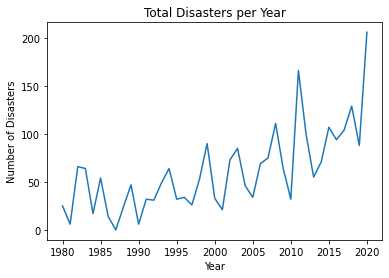

In [35]:
#create line plot x-axis year, y-axis number of disasters
x_axis_data = disaster_data_df["Year"].unique()
disaster_data = yearly_disaster_df["Total Disasters"]
plt.plot(x_axis_data, disaster_data)

#give graph axis titles
plt.title("Total Disasters per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")

plt.show()

In [37]:
state_group = disaster_count_df.groupby("State")

#get the sum of all disasters by state
state_disasters = state_group["All Disasters Count"].sum()

#get the sum of each disaster by state
state_droughts = state_group["Drought Count"].sum()
state_floods = state_group["Flooding Count"].sum()
state_freeze = state_group["Freeze Count"].sum()
state_severestorm = state_group["Severe Storm Count"].sum()
state_cyclone = state_group["Tropical Cyclone Count"].sum()
state_wildfire = state_group["Wildfire Count"].sum()
state_winter_storm = state_group["Winter Storm Count"].sum()

#create a df of disasters by year
state_disaster_df = pd.DataFrame({"Total Disasters":state_disasters,
                                  "Droughts":state_droughts,
                                  "Floods":state_floods,
                                  "Freezes":state_freeze,
                                  "Severe Storms":state_severestorm,
                                  "Cyclones":state_cyclone,
                                  "Wildfires":state_wildfire,
                                  "Winter Storms":state_winter_storm})
state_disaster_df

,Total Disasters,Droughts,Floods,Freezes,Severe Storms,Cyclones,Wildfires,Winter Storms
State,,,,,,,,
AK,7,0,0,0,0,0,7,0
AL,91,15,2,3,40,21,2,8
AR,74,14,9,2,39,4,0,6
AZ,26,12,1,0,1,0,12,0
CA,39,12,4,3,4,0,16,0
CO,52,13,2,1,26,0,10,0
CT,34,1,1,1,10,7,0,14
DE,29,5,1,1,5,7,0,10
FL,65,7,2,5,17,25,4,5


In [38]:
url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$filter=declarationDate gt '1980-01-01T04:00:00.000z'"
disaster_request = requests.get(url).json()
#disasters = disaster_request[2]
#pprint(disaster_request)

In [39]:
number_disasters = len(disaster_request['DisasterDeclarationsSummaries'])
print(f"There are {number_disasters} disasters.")

There are 1000 disasters.


In [40]:
summaries = disaster_request["DisasterDeclarationsSummaries"]

dates = []
types = []
state = []



for summary in summaries:
    #print(summary['declarationDate'])
    dates.append(summary['fyDeclared'])
    types.append(summary['declarationTitle'])
    state.append(summary['state'])
disasters_df = pd.DataFrame({"Dates": dates,
                            "Types": types,
                             "State": state
                            })

disasters_df.head()
#print(disaster_request["DisasterDeclarationsSummaries"][0]['declarationDate'])

,Dates,Types,State
0,1980,"TORRENTIAL RAIN, HIGH TIDE & WINDS",CA
1,1980,"TORRENTIAL RAIN, HIGH TIDE & WINDS",CA
2,1980,"TORRENTIAL RAIN, HIGH TIDE & WINDS",CA
3,1980,"SEVERE STORMS, HIGH SURF & FLOODING",HI
4,1980,SEVERE STORMS & FLOODING,AZ


In [41]:
count_gb = disasters_df.groupby("Dates")
total_by_year = count_gb["Types"].count()
total_by_year

Dates
1980    175
1981     66
1982     97
1983    242
1984    297
1985    123
Name: Types, dtype: int64

In [66]:
totals_by_year = pd.DataFrame({"Total Diasters": yearly_disaster_df["Total Disasters"],
                               "Total Cost":total_disaster_cost["All Disasters Cost"]
                              })
totals_by_year

,Total Diasters,Total Cost
Year,,
1980,25,37.9
1981,6,2.9
1982,66,4.4
1983,64,29.5
1984,17,2.6
1985,54,17.4
1986,14,5.6
1987,0,0.0
1988,24,45.0


In [ ]:
# #linear regression total disaster count and temp

x_values =totals_by_year['Total Disasters']
y_values = totals_by_year['Average Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(1985,150),fontsize=15,color="red")
plt.xlabel('Total Disasters')
plt.ylabel('Average Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()